In [1]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정 / 개인 자유
plt.style.use("ggplot")

# 1. 실전DB 살펴보기

In [4]:
df = pd.read_csv('./실전db.csv')
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [9]:
df.groupby(['USER_ID','DATE']).count()

JOIN_DATE  D_TYPE  STORE_ID  GOODS_TYPE  COUNT  AD1
USER_ID DATE                                                           
224     2020-01-12          1       1         1           1      1    1
        2020-12-09          1       1         1           1      1    1
232     2020-01-19          1       1         1           1      1    1
        2020-01-26          1       1         1           1      1    1
        2020-01-27          1       1         1           1      1    1
...                       ...     ...       ...         ...    ...  ...
1830551 2020-12-31          1       1         1           1      1    1
1830570 2020-12-31          1       1         1           1      1    1
1830580 2020-12-31          1       1         1           1      1    1
1830589 2020-12-31          1       1         1           1      1    1
1830598 2020-12-31          1       1         1           1      1    1

[879271 rows x 6 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [7]:
# 결제유형?
df.D_TYPE.value_counts()

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64

In [8]:
# 쿠폰분류?
df.GOODS_TYPE.value_counts()

A    609790
C    131163
B    118541
D     19777
Name: GOODS_TYPE, dtype: int64

In [24]:
# 지역? 
# 종로, 강남, 서초  등

print(df.AD1.unique())
print('분류 개수 : ', len(df.AD1.unique()))

['GN' 'J' 'SC' 'MP' 'JRR' 'YD' 'GJ' 'YO' 'GSN' 'GBC' 'BF' 'DJ' '0' 'CD'
 'NO' 'CY' 'YC' 'SD' 'GD' 'GSW' 'DM' 'R' 'GB' 'GS' 'GHN' 'SB' 'IND' 'P'
 'GW' 'JR' 'GEJ' 'GGY' 'GKP' 'CAS' 'SG' 'BJG' 'BHW' 'GAY' 'GYI' 'CCA'
 'PJP' 'GGC' 'IYS' 'DB' 'GGM' 'GAS' 'WOID' 'DIV' 'AOI' 'COI' 'GPJ' 'SOI'
 'ABP' 'DOI' 'WF' 'BI' 'ZP' 'EP' 'Q' 'BO' 'ZE' 'RRR' 'QGI' 'DSO' 'SOD'
 'BOI' 'WT' 'BP' 'SP' 'CN' 'SJV' 'SDU' 'QH' 'BUD' 'CU' 'VU' 'WAE' 'NW'
 'DY' 'WH' 'GR' 'X' 'CVB' 'ADS' 'VO']
분류 개수 :  85


In [29]:
df['COUNT'].groupby(df['AD1']).count()

# AD1에 0이 있음 
# 0을 결측값으로 봐야할까? 

AD1
0       4225
ABP      103
ADS        1
AOI       74
BF     18035
       ...  
YC      1617
YD     47686
YO     37171
ZE       873
ZP        30
Name: COUNT, Length: 85, dtype: int64

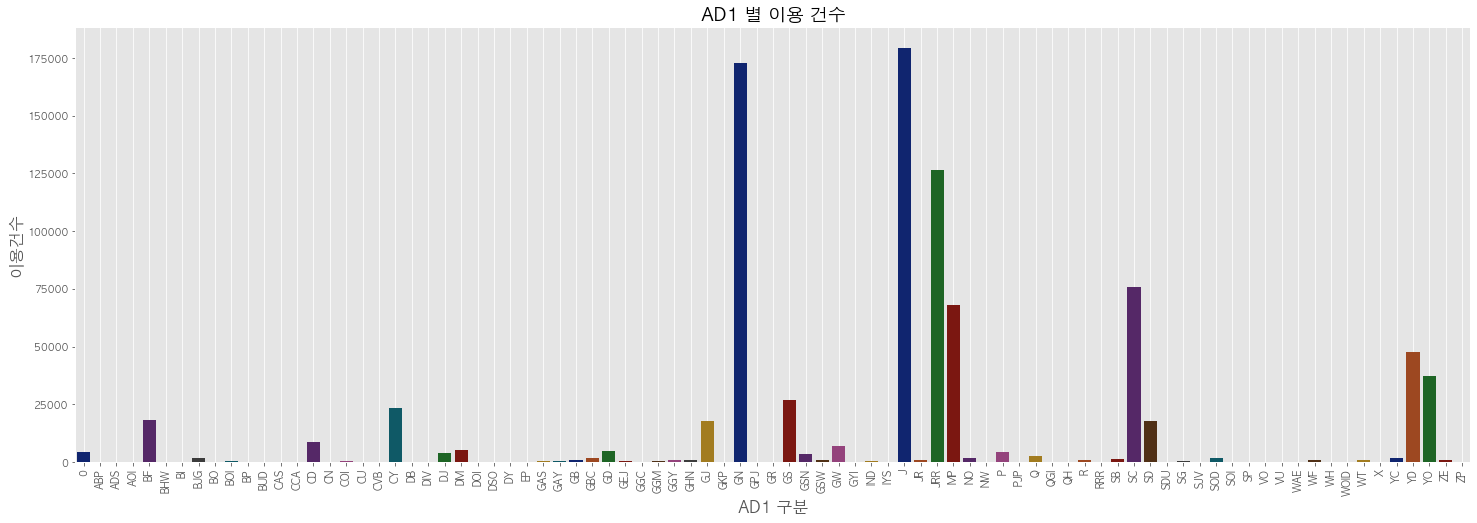

In [27]:
AD1_count = df['COUNT'].groupby(df['AD1']).count()
plt.figure(figsize=(25,8))
sns.barplot(AD1_count.index, AD1_count.values, palette='dark')
plt.grid()
plt.title('AD1 별 이용 건수', fontsize=18)
plt.ylabel('이용건수', fontsize=16)
plt.xlabel('AD1 구분', fontsize=16)
plt.xticks(rotation=90)
plt.show()

프로젝트 안내에는 점포주소 정보를 제공하는 것으로 되어 있음.
실전디비에서 STORE_ID와 AD1를 합치면 점포 지역이지 않을까 생각됨
AD1에서 1은 지역 구분이지 않을까? 예를 들어 AD1이 서울, AD2 경기, AD3 인천 등등

In [14]:
df.COUNT.value_counts()
# 유저별 이용 횟수에 대한 분석 
# 이후 모델링을 통해 COUNT 컬럼이 y가 되어 우리가 예측해야하는 값이 됨

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
16        21
12        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
17        15
23        15
21        14
18        14
25        14
19        13
22         9
32         9
26         9
27         7
24         7
30         7
31         7
34         7
29         6
20         6
36         5
40         4
37         3
39         3
38         3
46         3
49         3
35         3
42         2
43         2
33         2
50         2
47         2
55         1
53         1
51         1
58         1
41         1
48         1
45         1
44         1
59         1
61         1
Name: COUNT, dtype: int64

In [18]:
# 이용횟수에 따른 상대적 비율(분포)
df.COUNT.value_counts(normalize=True)

# 1회 사용이 전체의 0.982376% 차지

1     0.982376
2     0.015375
3     0.001207
4     0.000308
5     0.000155
6     0.000075
7     0.000051
9     0.000028
16    0.000024
12    0.000024
8     0.000023
13    0.000022
14    0.000022
15    0.000022
28    0.000019
10    0.000018
11    0.000017
17    0.000017
23    0.000017
21    0.000016
18    0.000016
25    0.000016
19    0.000015
22    0.000010
32    0.000010
26    0.000010
27    0.000008
24    0.000008
30    0.000008
31    0.000008
34    0.000008
29    0.000007
20    0.000007
36    0.000006
40    0.000005
37    0.000003
39    0.000003
38    0.000003
46    0.000003
49    0.000003
35    0.000003
42    0.000002
43    0.000002
33    0.000002
50    0.000002
47    0.000002
55    0.000001
53    0.000001
51    0.000001
58    0.000001
41    0.000001
48    0.000001
45    0.000001
44    0.000001
59    0.000001
61    0.000001
Name: COUNT, dtype: float64

# 2. 서울시 기상데이터 살펴보기 

In [33]:
weather_df = pd.read_csv('./서울시_기상데이터.csv', encoding='cp949')
weather_df

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0
...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1


In [40]:
# 지점 컬럼이 실전디비의 점포아이디와 연결이 될지 살펴봤으나 어려워보임.
# 아무래도 저 지점은 기상 관측대가 있는 장소에 코드로 예상됨
weather_df['지점'].value_counts()

108    8760
Name: 지점, dtype: int64

### 기상청 서울지점(108) 기상관측소 상세

- 기관지점번호	: 108
- 지점명(한글)	: 서울	지점명(영문)	
- 관측개시일	: 1907-10-01	관측주기(분)	1
- 좌표(WGS84)	: 위도 : 37.57142 경도 : 126.9658
- GPS측정지점	: 표석에서 측정
- 해발고도(m)	: 86

*기상청 데이터 : https://data.kma.go.kr/cmmn/main.do



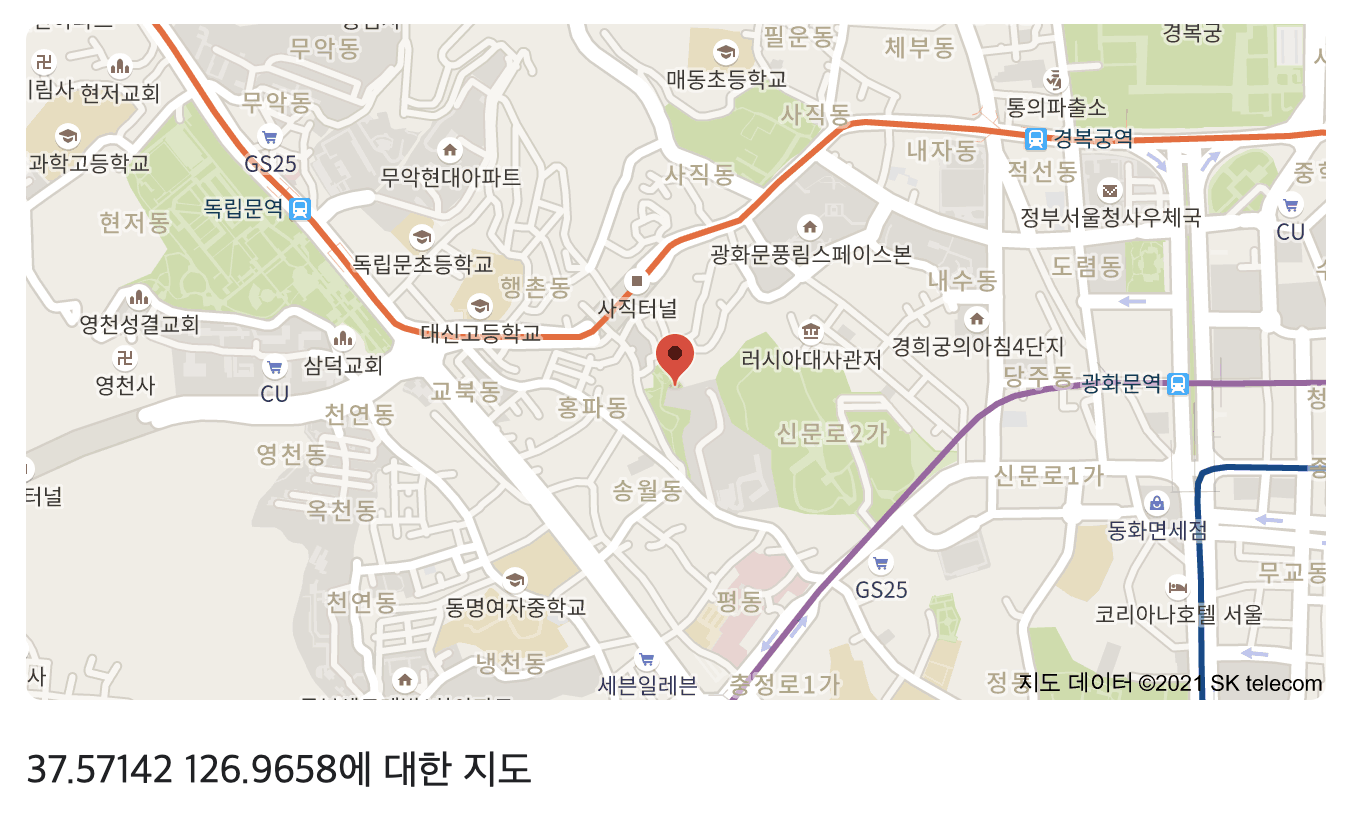

In [41]:
from IPython.display import Image
Image("./loc_108.png")

### 기상데이터 활용 아이디어

기상데이터는 매일 24시간으로 나누어 기상 측정 데이터가 있음

1) 매일, 강수량 유무
- 특정 시간을 뽑아서 오전(예 8시), 오후(예 3시)로 나누고
- 비가 왔지는 여부로 구분 

2) 매일, 평균기온
- 매일의 평균기온을 구해 한파, 폭염, 평온으로 구분

3) 공휴일 및 특정일자(실전db도 활용 가능)
- 휴일 및 연휴, 혹은 휴가철 등 특정 날짜만 뽑아 가중치로 활용? 
- 월마트 실습에서 크리스마스, 노동절 등 주요 연휴 기간에 가중치를 다르게 했던 사례 적용
- 휴일에 날씨가 좋으면 가중치 높게

# 3. 교통데이터 살펴보기

In [38]:
traffic_df = pd.read_excel('./2020교통량통합.xlsx', engine='openpyxl')
traffic_df

,DATE,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2020-01-01,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,712.0,645.0,437.0,309.0,290.0,...,1472.0,1416.0,1483.0,1329.0,1157.0,1014.0,954.0,849.0,780.0,480.0
1,2020-01-02,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,315.0,222.0,186.0,165.0,266.0,...,1792.0,1897.0,1842.0,2061.0,1994.0,1443.0,1233.0,1165.0,1094.0,852.0
2,2020-01-03,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,632.0,457.0,295.0,236.0,279.0,...,2004.0,1929.0,2049.0,2140.0,2178.0,1654.0,1356.0,1260.0,1253.0,941.0
3,2020-01-04,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,740.0,518.0,388.0,331.0,330.0,...,1837.0,1788.0,1588.0,1669.0,1530.0,1222.0,1143.0,1089.0,1039.0,791.0
4,2020-01-05,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,533.0,424.0,297.0,230.0,209.0,...,1634.0,1673.0,1494.0,1429.0,1288.0,1035.0,987.0,884.0,803.0,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98815,2020-12-27,서부간선도로,F-09,유출,목동교->신정교,1310.0,804.0,582.0,473.0,488.0,...,3026.0,2957.0,2799.0,2858.0,2805.0,3031.0,3173.0,2928.0,2278.0,1559.0
98816,2020-12-28,서부간선도로,F-09,유출,목동교->신정교,1030.0,614.0,501.0,565.0,1160.0,...,2925.0,2595.0,2705.0,2264.0,2272.0,2954.0,3081.0,3099.0,2521.0,1837.0
98817,2020-12-29,서부간선도로,F-09,유출,목동교->신정교,1294.0,833.0,582.0,597.0,900.0,...,2634.0,2851.0,2704.0,2163.0,2165.0,2738.0,3054.0,3078.0,2544.0,1952.0
98818,2020-12-30,서부간선도로,F-09,유출,목동교->신정교,1451.0,929.0,616.0,591.0,929.0,...,2901.0,2636.0,2175.0,2036.0,1969.0,2787.0,3058.0,2936.0,2730.0,2160.0


In [39]:
traffic_df.groupby(['DATE']).count()

,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,5시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-01,270,270,270,270,258,258,258,258,258,258,...,257,257,257,257,258,258,258,258,258,258
2020-01-02,270,270,270,270,257,257,257,257,257,257,...,255,258,258,258,258,258,258,258,258,258
2020-01-03,270,270,270,270,259,259,259,259,259,259,...,259,259,259,259,259,259,259,259,259,259
2020-01-04,270,270,270,270,260,260,260,260,260,260,...,257,257,259,260,260,260,260,260,260,260
2020-01-05,270,270,270,270,260,260,260,260,260,260,...,260,260,260,260,260,260,260,260,260,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,270,270,270,270,232,232,232,232,232,232,...,236,236,236,236,236,236,235,235,235,235
2020-12-28,270,270,270,270,236,236,236,236,236,236,...,235,235,235,235,235,235,235,235,235,235
2020-12-29,270,270,270,270,235,235,235,235,235,235,...,238,238,238,238,238,238,238,239,238,238


In [14]:
traffic_df['지점명'].value_counts()

성수대교            732
진흥로(구기터널)       732
광진교             732
동부간선도로(월계1교)    732
을지로(을지로3가역)     732
               ... 
천호대로(상일IC)      732
동작대로(총신대입구역)    732
율곡로(안국역)        732
소월로(회현역)        732
금천교(광명시계)       732
Name: 지점명, Length: 135, dtype: int64

## 서울시 교통량 데이터 (데이터 출처) 

### 1) 교통량 측정 카메라 위치

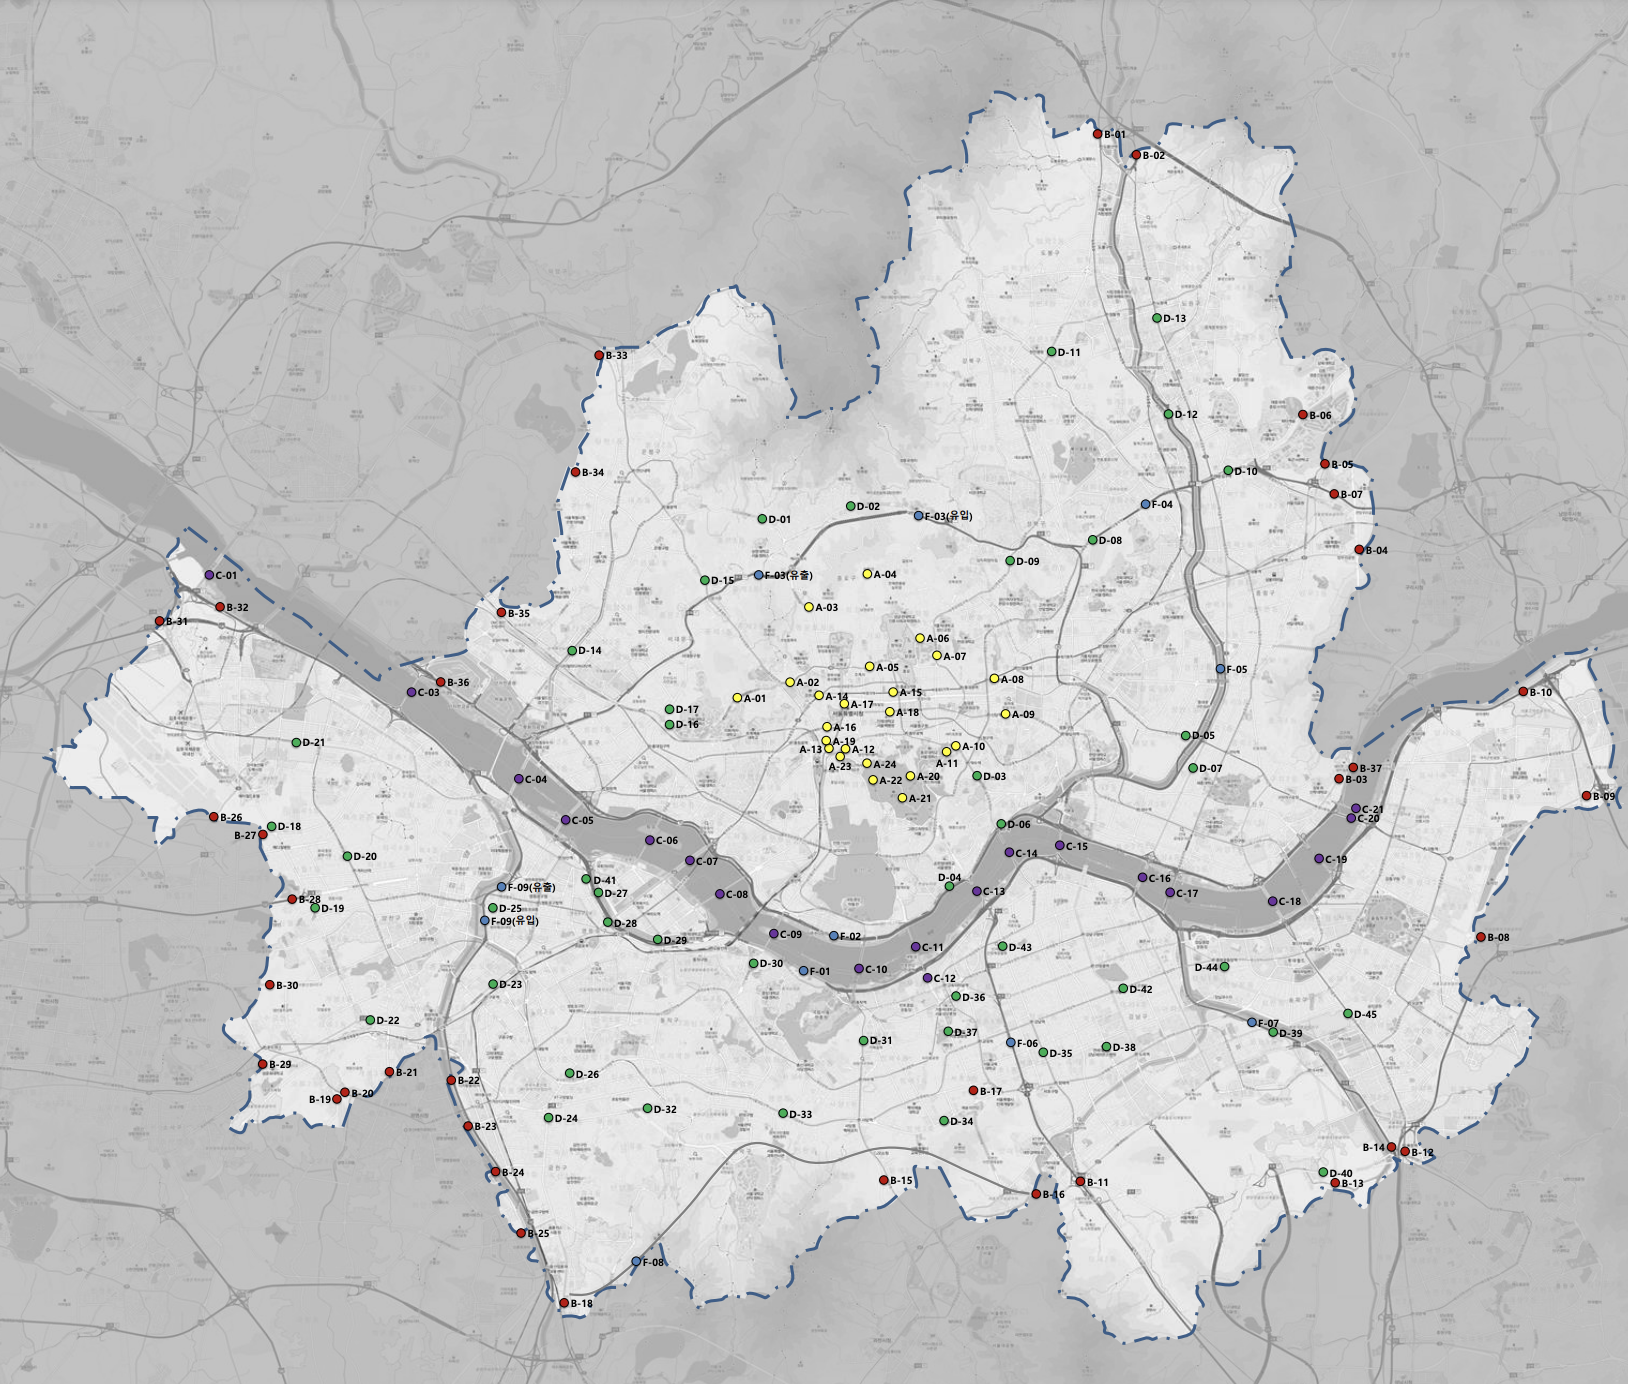

In [4]:
from IPython.display import Image
Image("./교통지도.png")
# ![nn](./교통지도.png)



### 2) 서울시 교통량 수집지점 구분

 출처 및 참고: https://topis.seoul.go.kr/refRoom/openRefRoom_2.do

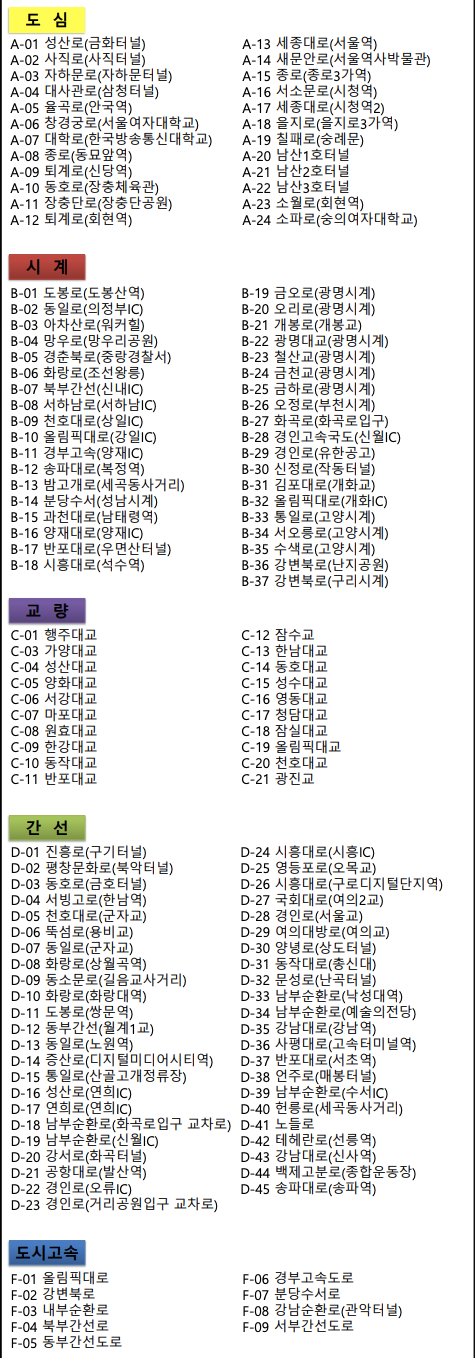

In [5]:
Image("./교통구분.png")